In [1]:
%pylab inline
import ipywidgets
import random
import ast
import json

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Loading the network file from txt:
with open('network_m4.txt') as f:
    network = json.load(f)
Network = network
N = len(network) # as the number of nodes is constant worth storing in a global variable

In [6]:
def Init(initial_infection):
    '''
    @summary: To start the spreading process we need some initially infected nodes, this function creates them
    @param initial_infection: The number of infected nodes at the begining of the process
    @type initial_infection: int
    '''
    init = [] 
    init = random.sample(range(0, len(network)), initial_infection) # fills the list with initial_infection times different random numbers
    init.sort()
    for i in range(len(network)):
        if i in init:
            infected[i] = 1
        else:
            infected[i] = 0

def onePerLink():
    '''
    @summary: If a node is infected all of its links have the probability to infect. The first step is to check if the infected node heals, then go through every link to chek if infects.
    '''
    newInfected = []
    for i, l in enumerate(network):
        if infected[i] == 1:
            if healing_prob > uniform():
                infected[i] = 0
            else:
                for j in l:
                    if infection_prob > uniform():
                        newInfected.append(j)
    for i in newInfected:
        infected[i] = 1
        
            
def onePerNode():
    '''
    @summary: If a node is infected only one of its links has the probability to infect. The first step is to check if the infected node heals, then check if it infects, if so we chose one random link. 
    '''
    newInfected = []
    for i, l in enumerate(network):
        if infected[i] == 1:
            r = uniform()
            if healing_prob > r:
                infected[i] = 0
            elif effective_inf_prob > r:
                newInfected.append(l[randint(len(l))])
    for i in newInfected:
        infected[i] = 1
        
def Epidemic(numberOfSteps):
    '''
    @summmary: iterates over the network numberOfSteps times with onePerLink spreading type
    @param numberOfSteps: number of iteration steps
    @type numberOfSteps: int
    @returns [{list}] [returns with infection-over-time list]
    '''
    I = []
    for i in range(numberOfSteps):
        onePerLink()
        s = sum(infected)
        #if s == N or s == 0:
        #    break
        I.append(s)
    return I

def steadyState(mylist, needplot):
    '''
    * Counts averages. First for all the  data, then drops the first point, then drops the first 2 points, ...
    * Checks infection point in this list of averages.
    @summary: gives the point where the process reaches the steady-state and the average value in the steady-state
    @param {list} mylist: the list of the spreading process
    @param {int} length: how long 
    @param {boolean} needplot: if True, the function will plot the process, with the "steady-state point"
    @returns [{list}] [returns with steady-state's mean, time step where reaches steady-state, standard deviation of steady-state in a list]
    '''
    def avg(mylist):
        return sum(mylist)/len(mylist)
    def fromHere(mylist, value):
        i = 0
        while mylist[i] < value:
            i += 1
        return i
    y = []
    inflection = True
    inf = 0
    i = 0
    while inflection and i < len(mylist):
        y.append(mean(mylist[i:]))
        if y[i] < y[i-1]:
            inflection = False
            inf = i
        i += 1
    if needplot:
        plot(mylist)    
        plot(fromHere(mylist, y[inf]), mylist[fromHere(mylist, y[inf])], marker='o')
    Return = [mean(mylist[inf:]), fromHere(mylist, y[inf]), std(mylist[inf:])]
    return Return

Text(0,0.5,'number of infected nodes')

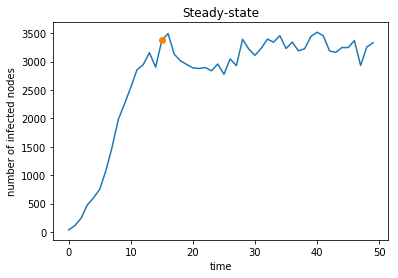

In [9]:
initial_infection = 42 # number of nodes which are infected at t = 0
infection_prob = 0.5
healing_prob = 0.8
effective_inf_prob = infection_prob*(1 - healing_prob)
infected = [0] * (len(network))
Init(initial_infection)
steadyState(Epidemic(50), True)
title('Steady-state')
xlabel('time')
ylabel('number of infected nodes')